<a href="https://colab.research.google.com/github/nxxk23/kidney/blob/main/widetable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
DrugDF = pd.read_csv('/content/drive/MyDrive/kidney/widetable/drug.csv')
DiagDF = pd.read_csv('/content/drive/MyDrive/kidney/widetable/diag.csv')
LabDF = pd.read_csv('/content/drive/MyDrive/kidney/widetable/lab.csv')
VisitDF = pd.read_csv('/content/drive/MyDrive/kidney/widetable/visit.csv')
VitalDF = pd.read_csv('/content/drive/MyDrive/kidney/widetable/vital.csv')

VisitDF = VisitDF.iloc[:, 1:]
VitalDF = VitalDF.iloc[:, 1:]
LabDF = LabDF.iloc[:, 1:]
DiagDF = DiagDF.iloc[:, 1:]
DrugDF = DrugDF.iloc[:, 1:]

print(DrugDF.shape)
print(DiagDF.shape)
print(LabDF.shape)
print(VisitDF.shape)
print(VitalDF.shape)

(318675, 26)
(318675, 23)
(318675, 37)
(318675, 17)
(318675, 11)


In [3]:
DrugDF.head(1)

,PatientUID,PatientVisitUID,G1M2_ARB,G3M1_Statin,G5M2_NSAIDs,G1M5_Diuretic,G1M7_Beta_blocker,G1M3_Dihydropyridine_CCB,G1M6_MRA,G1M1_ACEI,...,G1M9_Vasodilator,G1M8_Alpha_blocker,G2M6_Insulin,G2M4_TZD,G4M2_Febuxostat,G3M2_Ezetimibe,G1M4_Non-dihydropyridine_CCB,G5M1_Ketoanalog_amino_acid,G2M7_GLP1_RA,G4M3_Uricosuric_agent
0,2299,3386255,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
DiagDF.head(1)

,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,datetime,PreviousDateTime,D1_Hypertension,D10_Ischemic_heart_disease,D11_Heart_failure,...,D15_Solid_malignancy,D16_Hematologic_malignancy,D2_Diabetes_mellitus,D3_Dyslipidemia,D4_SLE,D5_Systemic_sclerosis,D6_Rheumatoid_arthritis,D7_HIV_infection,D8_HBV_infection,D9_HCV_infection
0,2299,3386255,2559-08-15 09:51:54.913,eGFR(CKD-EPI) age >=18,71.7,2016-08-15 09:51:54.913,NaN,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
LabDF.head(1)

,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,datetime,PreviousDateTime,L1_eGFR,L10_Phosphorus,L11_Albumin,...,L29_UrineVolume_24hrs,L3_Creatinine,L30_UrineUrea_24hrs,L32_UrineProtein_24hrs,L4_Sodium,L5_Potassium,L6_Chloride,L7_Bicarbonate,L8_Uric,L9_Calcium
0,2299,3386255,2559-08-15 09:51:54.913,eGFR(CKD-EPI) age >=18,71.7,2016-08-15 09:51:54.913,NaN,71.7,NaN,NaN,...,NaN,0.8,NaN,NaN,NaN,NaN,18.5,NaN,NaN,NaN


In [6]:
VisitDF.head(1)

,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,datetime,PreviousDateTime,Sex,Age,ENTY,NATNL,Location,StartDTTM,EndDttm,InPatient,OutPatient,Emergency
0,2299,3386255,2559-08-15 09:51:54.913,eGFR(CKD-EPI) age >=18,71.7,2016-08-15 09:51:54.913,NaN,หญิง,73.0,Out Patient,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,2559-08-15 08:13:26.043,2559-08-16 05:01:01.473,0.0,1.0,0.0


In [7]:
VitalDF.head(1)

,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,datetime,PreviousDateTime,BMI,BSA,Diastolic BP,Systolic BP
0,2299,3386255,2559-08-15 09:51:54.913,eGFR(CKD-EPI) age >=18,71.7,2016-08-15 09:51:54.913,NaN,20.8,1.39,75.0,127.0


In [8]:
VitalDF.columns

Index(['PatientUID', 'PatientVisitUID', 'CWhen', 'ResultItemName',
       'ResultValue', 'datetime', 'PreviousDateTime', 'BMI', 'BSA',
       'Diastolic BP', 'Systolic BP'],
      dtype='object')

## **merge**

In [13]:
merged_df = VisitDF.merge(VitalDF, on=['PatientUID', 'PatientVisitUID'], how='outer', suffixes=('', '_visit')) \
                    .merge(LabDF, on=['PatientUID', 'PatientVisitUID'], how='outer', suffixes=('', '_vital')) \
                    .merge(DiagDF, on=['PatientUID', 'PatientVisitUID'], how='outer', suffixes=('', '_diag')) \
                    .merge(DrugDF, on=['PatientUID', 'PatientVisitUID'], how='outer', suffixes=('', '_drug'))

# Dropping duplicate columns if necessary
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

In [17]:
print(merged_df.shape)
merged_df.head()

(318675, 106)


,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,datetime,PreviousDateTime,Sex,Age,ENTY,...,G1M9_Vasodilator,G1M8_Alpha_blocker,G2M6_Insulin,G2M4_TZD,G4M2_Febuxostat,G3M2_Ezetimibe,G1M4_Non-dihydropyridine_CCB,G5M1_Ketoanalog_amino_acid,G2M7_GLP1_RA,G4M3_Uricosuric_agent
0,2299,3386255,2559-08-15 09:51:54.913,eGFR(CKD-EPI) age >=18,71.7,2016-08-15 09:51:54.913,NaN,หญิง,73.0,Out Patient,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2299,3640924,2559-11-11 09:40:06.053,eGFR(CKD-EPI) age >=18,66.8,2016-11-11 09:40:06.053,2016-08-15 09:51:54.913,หญิง,73.0,Out Patient,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2299,4020970,2560-03-31 10:18:54.363,eGFR(CKD-EPI) age >=18,67.2,2017-03-31 10:18:54.363,2016-11-11 09:40:06.053,หญิง,74.0,Out Patient,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2299,4286612,2560-07-05 10:40:40.763,eGFR(CKD-EPI) age >=18,69.2,2017-07-05 10:40:40.763,2017-03-31 10:18:54.363,หญิง,74.0,Out Patient,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2299,4546471,2560-10-03 09:19:54.710,eGFR(CKD-EPI) age >=18,63.6,2017-10-03 09:19:54.710,2017-07-05 10:40:40.763,หญิง,74.0,Out Patient,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
merged_df = merged_df.drop(columns=['PreviousDateTime_diag','PreviousDateTime_vital','PreviousDateTime_visit'])
print(merged_df.shape)

(318675, 104)


# **null handling**

In [31]:
# Count the number of nulls in each column
null_counts = merged_df.isnull().sum()

# Filter columns with null values
null_columns = null_counts[null_counts > 0]

# Display the columns with their null counts
print(null_columns)

PreviousDateTime                  1
Sex                               1
Age                               1
ENTY                              1
NATNL                           361
InPatient                         1
OutPatient                        1
Emergency                         1
BMI                           90961
BSA                           91001
Diastolic BP                  38811
Systolic BP                   38654
L1_eGFR                          16
L10_Phosphorus               250630
L11_Albumin                  159314
L12_Hemoglobin               165634
L13_Hematocrit               118596
L14_WBC                      118671
L15_Platelet                 118669
L16_TIBC                     312785
L18_Ferritin                 306794
L19_Blood_sugar              192515
L2_BUN                       300535
L20_HbA1c                    310869
L21_Cholesterol               49185
L22_Triglyceride             185905
L23_LDL_Cholesterol          167212
L24_HDL_Cholesterol         

> **LabLocation (mode) column and fill null in VisitLocation**

In [21]:
import pandas as pd
lab = pd.read_csv('/content/drive/MyDrive/kidney/ckdresearch2023/Lab.csv')

mode_location = lab.groupby('PatientUID')['Location'].apply(lambda x: x.mode()[0]).reset_index()
mode_dict = dict(zip(mode_location['PatientUID'], mode_location['Location']))
# fill null location from file visit with location from file lab
merged_df['Location'] = merged_df.apply(lambda row: mode_dict[row['PatientUID']] if pd.isnull(row['Location']) else row['Location'], axis=1)
merged_df['LabLocation'] = lab['PatientUID'].map(mode_location.set_index('PatientUID')['Location'])

In [29]:
merged_df = merged_df.rename(columns={'Location': 'VisitLocation'})

> **Fill null of StartDTTM and EndDttm by mode of each ID**

In [30]:
visit = pd.read_csv('/content/drive/MyDrive/kidney/ckdresearch2023/Visit.csv')
mode_start = visit.groupby('PatientUID')['StartDTTM'].apply(lambda x: x.mode()[0]).reset_index()
mode_dt = dict(zip(mode_start['PatientUID'], mode_start['StartDTTM']))
merged_df['StartDTTM'] = merged_df.apply(lambda row: mode_dt[row['PatientUID']] if pd.isnull(row['StartDTTM']) else row['StartDTTM'], axis=1)

mode_end = visit.groupby('PatientUID')['EndDttm'].apply(lambda x: x.mode()[0]).reset_index()
mode_tm = dict(zip(mode_end['PatientUID'], mode_end['EndDttm']))
merged_df['EndDttm'] = merged_df.apply(lambda row: mode_tm[row['PatientUID']] if pd.isnull(row['EndDttm']) else row['EndDttm'], axis=1)

<ipython-input-30-bc58a083986d>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  visit = pd.read_csv('/content/drive/MyDrive/kidney/ckdresearch2023/Visit.csv')


In [35]:
merged_df['Age'] = merged_df['Age'].fillna('69')
merged_df['Sex'] = merged_df['Sex'].fillna('หญิง')
merged_df['NATNL'] = merged_df['NATNL'].fillna('ไทย')
merged_df['ENTY'] = merged_df['ENTY'].fillna('OutPatient')
merged_df['InPatient'] = merged_df['InPatient'].fillna(0)
merged_df['OutPatient'] = merged_df['OutPatient'].fillna(1)
merged_df['Emergency'] = merged_df['Emergency'].fillna(0)

In [40]:
# Fill null values in L1_eGFR with ResultValue
merged_df['L1_eGFR'] = merged_df['L1_eGFR'].fillna(merged_df['ResultValue'])

In [41]:
# Count the number of nulls in each column
null_counts = merged_df.isnull().sum()

# Filter columns with null values
null_columns = null_counts[null_counts > 0]

# Display the columns with their null counts
print(null_columns)

PreviousDateTime                  1
BMI                           90961
BSA                           91001
Diastolic BP                  38811
Systolic BP                   38654
L10_Phosphorus               250630
L11_Albumin                  159314
L12_Hemoglobin               165634
L13_Hematocrit               118596
L14_WBC                      118671
L15_Platelet                 118669
L16_TIBC                     312785
L18_Ferritin                 306794
L19_Blood_sugar              192515
L2_BUN                       300535
L20_HbA1c                    310869
L21_Cholesterol               49185
L22_Triglyceride             185905
L23_LDL_Cholesterol          167212
L24_HDL_Cholesterol          220456
L25_Parathyroid_hormone      318674
L26_Vitamin_D                318670
L27_UrineAlbumin/Cr_ratio    318674
L28_UrineProtein/Cr_ratio    307383
L29_UrineVolume_24hrs        318673
L3_Creatinine                    19
L30_UrineUrea_24hrs          314958
L32_UrineProtein_24hrs      

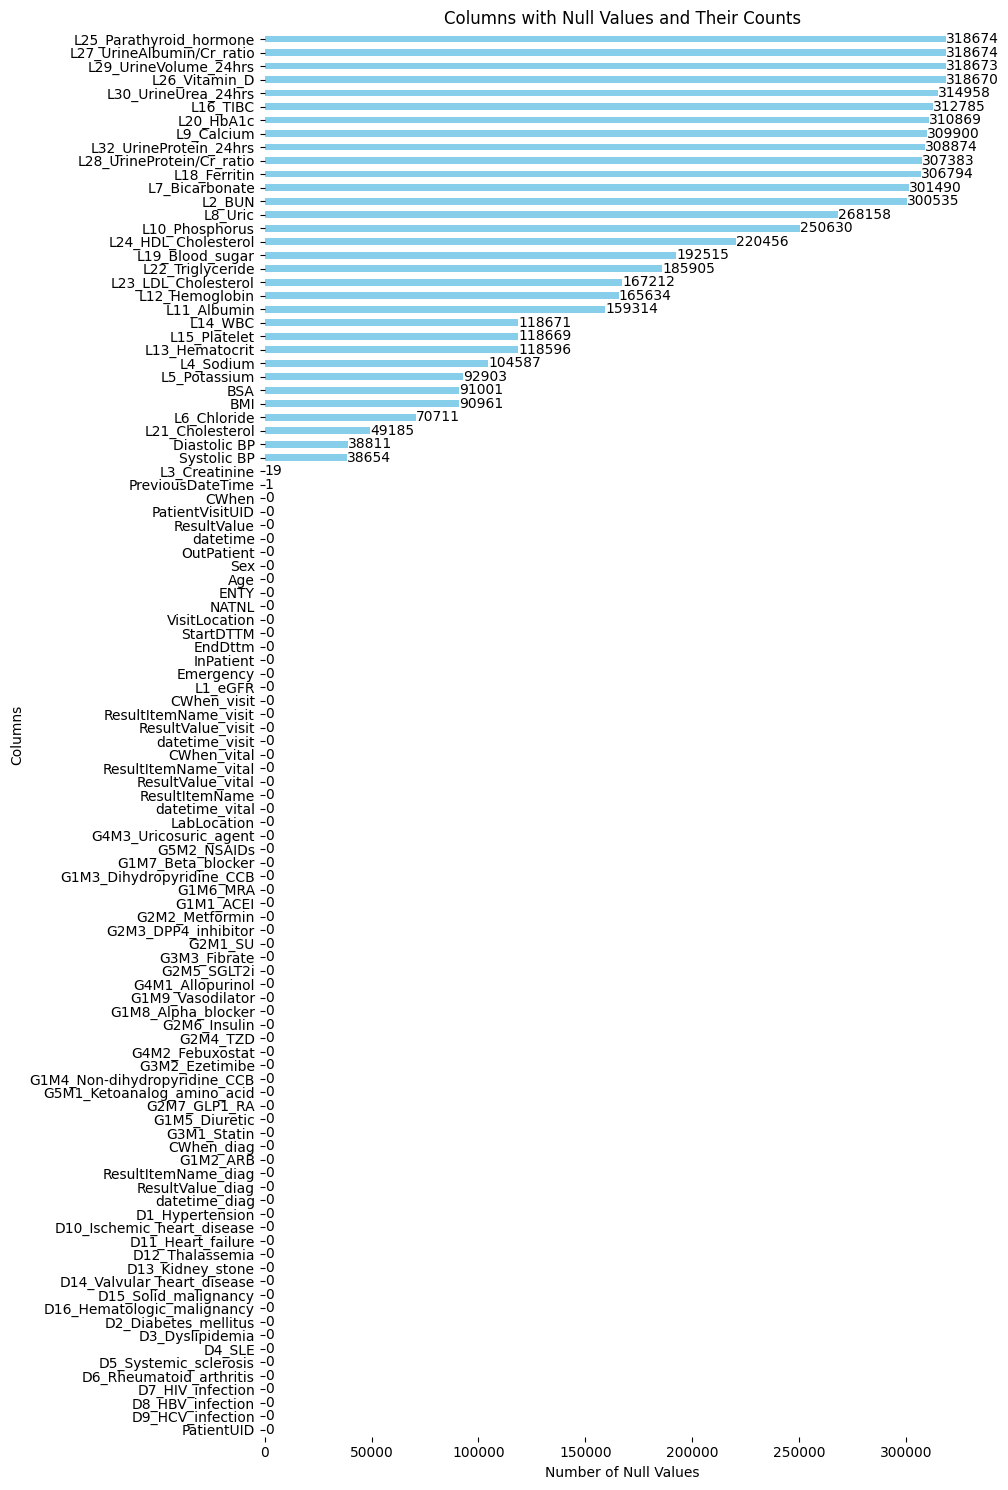

In [42]:
df = pd.DataFrame(merged_df)

import pandas as pd
import matplotlib.pyplot as plt

null_df = df.isnull()
null_count = null_df.sum()
null_count_sorted = null_count.sort_values()
plt.figure(figsize=(10, 15))  # Adjust the figsize to control the plot size
ax = null_count_sorted.plot(kind='barh', color='skyblue', edgecolor='none')  # Use 'barh' for horizontal bars
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Columns with Null Values and Their Counts')
plt.xlabel('Number of Null Values')
plt.ylabel('Columns')
plt.tight_layout()
label_distance = 10
for i, v in enumerate(null_count_sorted):
    ax.text(v + label_distance, i, str(v), color='black', va='center')

plt.show()

In [44]:
df.to_csv('/content/drive/MyDrive/kidney/widetable.csv')